# Modeling

from the EDA file we have done feture engineerign, transform and clean. Then we prepare our data and store it as features.csv

Our problem is to predict whether the sample will churn or stay. This reduce to binary classification problem.

In [1]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
import pandas as pd

### 1. data sampling

In [7]:
# Make a copy of our data
train_df = pd.read_csv('./features.csv')

# Separate target variable from independent variables
y = train_df['churn']
X = train_df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14605, 67)
(14605,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10223, 67)
(10223,)
(4382, 67)
(4382,)


### 2. Model training

In [9]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [10]:
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [11]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 19
False positives: 2
True negatives: 3978
False negatives: 383

Accuracy: 0.9121405750798722
Precision: 0.9047619047619048
Recall: 0.0472636815920398


### 3. Model understanding

In [12]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

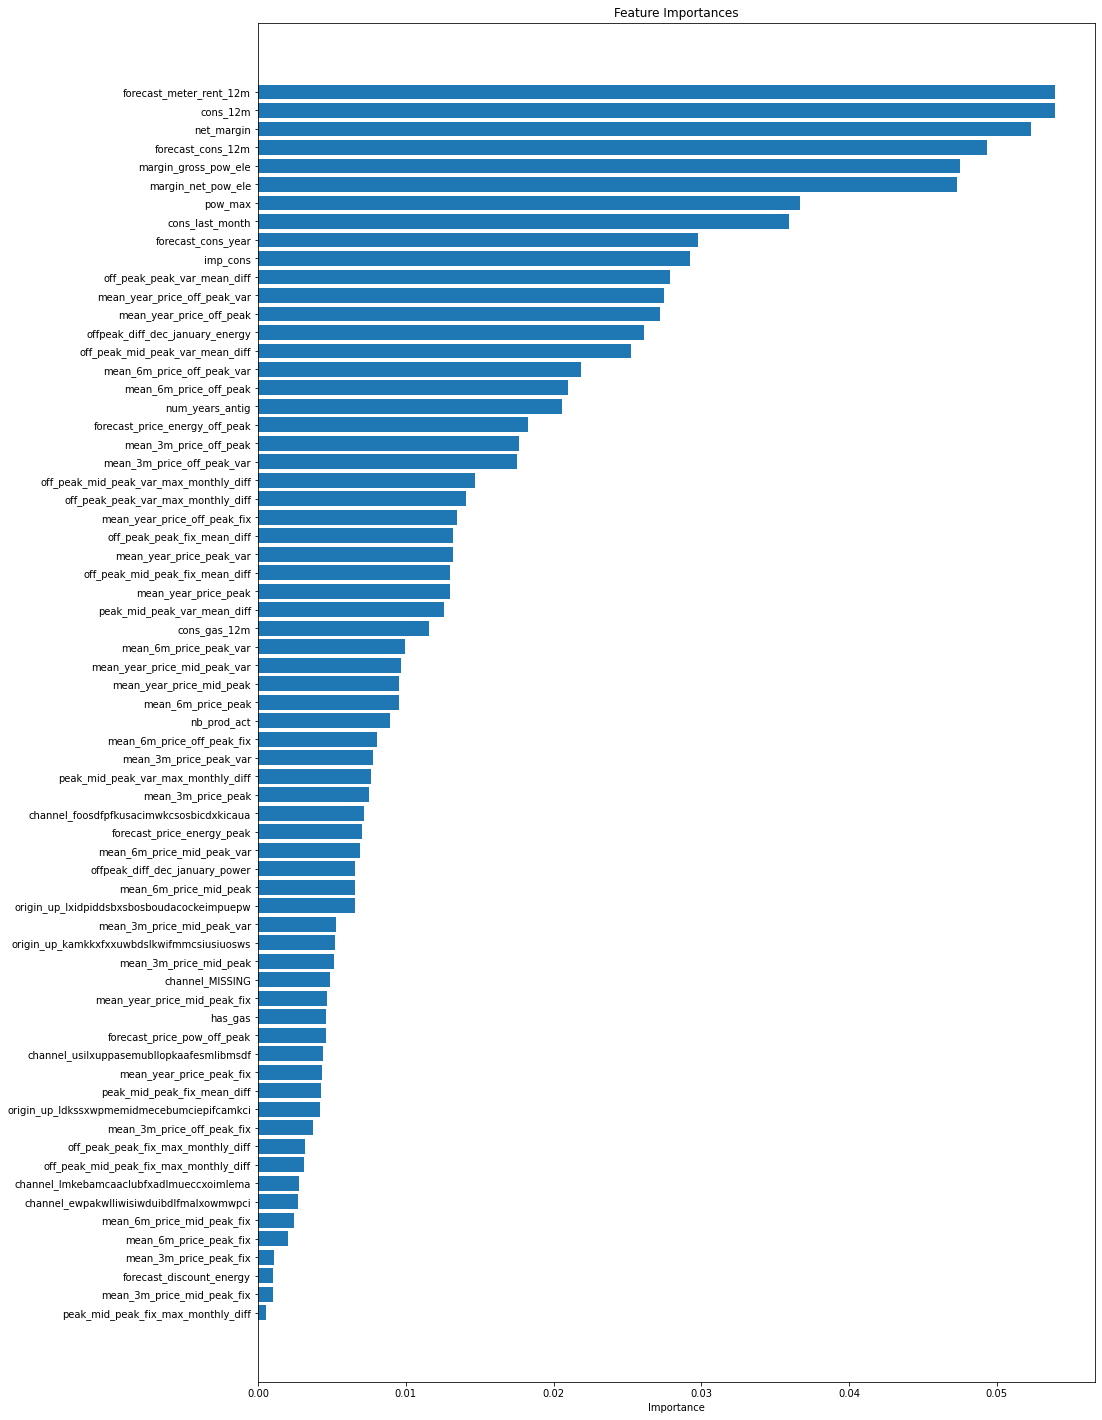

In [15]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

1. item The top 3 features that have the most contribute are 
- forecast_meter_rent_12m
- cons_12m
- net_margin.

2. margin also an influential driver

3. Our price sensitivity features are scattered around but are not the main driver for a customer churning

In [16]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [17]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [18]:
X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')

In [20]:
predict_df = pd.read_csv('./out_of_sample_data_with_predictions.csv')

In [22]:
predict_df[['churn','churn_probability']].sort_values('churn', ascending=False)

,churn,churn_probability
128,1,0.867
1118,1,0.589
788,1,0.635
2919,1,0.982
3525,1,0.935
...,...,...
1469,0,0.069
1470,0,0.116
1471,0,0.030
1472,0,0.067
